#Carga de datos tratados


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

df=pd.read_csv('datos_tratados.csv')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.40


In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [ ]:
df_model = df.drop(columns=['customerID', 'Charges']) #Eliminamos columnas n necesarias
df_model.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,Female,0,Yes,Yes,9,Yes,No,Dsl,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,Dsl,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:


df_model['Churn'] = df_model['Churn'].map({'No': 0, 'Yes': 1})

#  Detectar columnas categóricas (object)
cat_cols = df_model.select_dtypes(include='object').columns.tolist()

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)
df_model.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Female,0,Yes,Yes,9,Yes,No,Dsl,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0,Male,0,No,No,9,Yes,Yes,Dsl,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,1,Male,0,No,No,4,Yes,No,Fiber Optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,1,Male,1,Yes,No,13,Yes,No,Fiber Optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,1,Female,1,Yes,No,3,Yes,No,Fiber Optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
df_encoded=df_encoded.dropna()


In [ ]:
df_encoded.isnull().sum()


,0
Churn,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No Phone Service,0


In [ ]:
df_encoded.head()

,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No Phone Service,...,StreamingTV_No Internet Service,StreamingTV_Yes,StreamingMovies_No Internet Service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [ ]:
df_encoded.columns

Index(['Churn', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No Phone Service', 'MultipleLines_Yes',
       'InternetService_Fiber Optic', 'InternetService_No',
       'OnlineSecurity_No Internet Service', 'OnlineSecurity_Yes',
       'OnlineBackup_No Internet Service', 'OnlineBackup_Yes',
       'DeviceProtection_No Internet Service', 'DeviceProtection_Yes',
       'TechSupport_No Internet Service', 'TechSupport_Yes',
       'StreamingTV_No Internet Service', 'StreamingTV_Yes',
       'StreamingMovies_No Internet Service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df_encoded['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


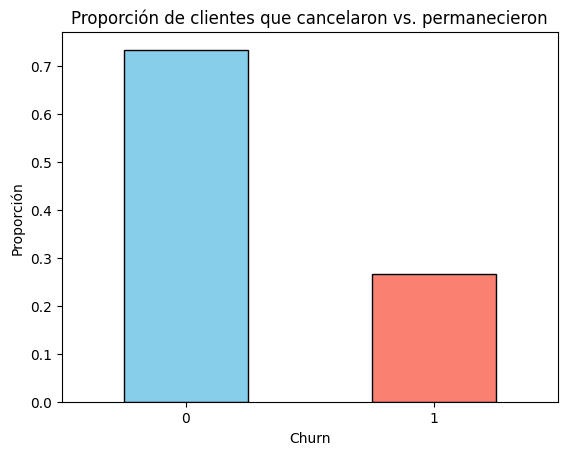

In [ ]:
df_encoded['Churn'].value_counts(normalize=True).plot(
    kind='bar',
    color=['skyblue', 'salmon'],
    edgecolor='black'
)
plt.title('Proporción de clientes que cancelaron vs. permanecieron')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.show()

#Correlación y selección de variables


In [ ]:
import seaborn as sns

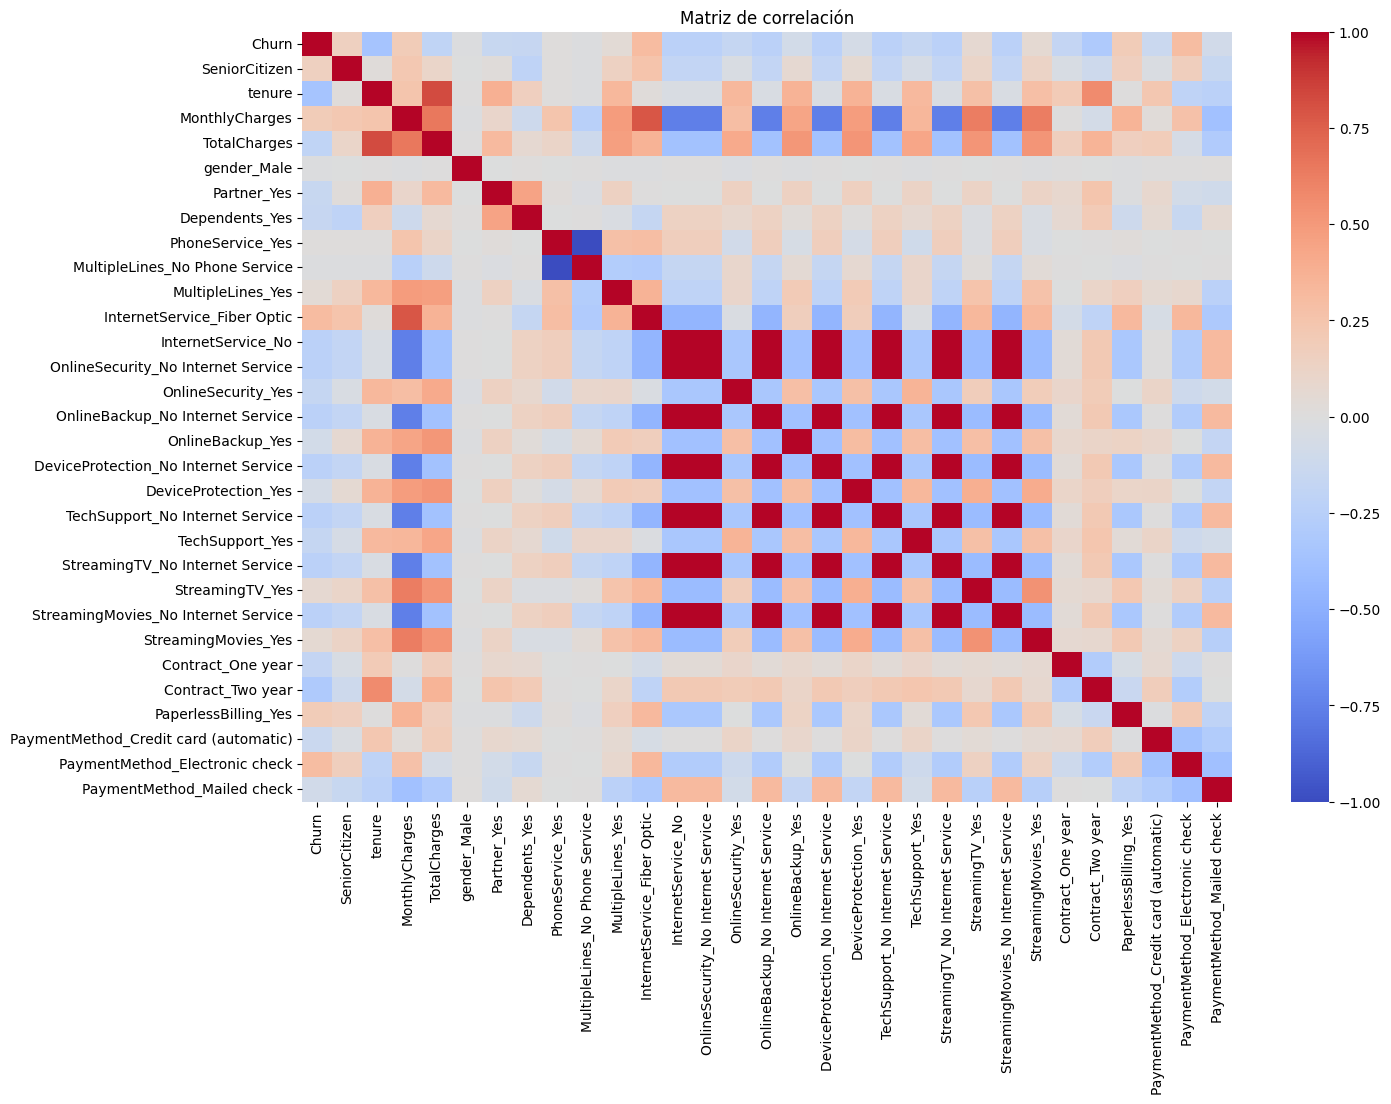

Churn                                    1.000000
InternetService_Fiber Optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No Phone Service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


In [ ]:
corr_matrix = df_encoded.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0
)
plt.title('Matriz de correlación')
plt.show()


corr_churn = corr_matrix['Churn'].sort_values(ascending=False)
print(corr_churn)

In [ ]:
corr = df_encoded.corr()['Churn'].abs()

# Filtro por umbral
umbral = 0.15
vars_correlacionadas = corr[corr >= umbral].index.drop('Churn')

/tmp/ipython-input-2218901637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Churn', y='tenure', palette=['skyblue', 'salmon'])


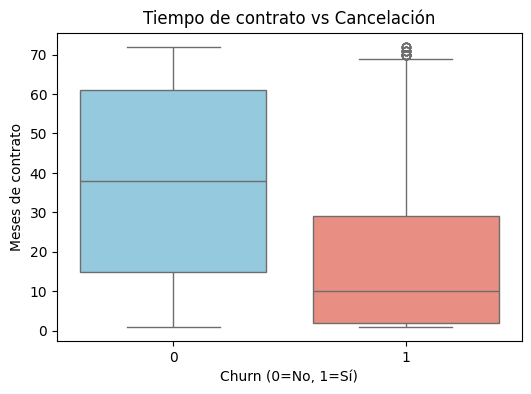

In [ ]:
#Analisis dirigido
plt.figure(figsize=(6,4))
sns.boxplot(data=df_encoded, x='Churn', y='tenure', palette=['skyblue', 'salmon'])
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Meses de contrato')
plt.show()


/tmp/ipython-input-3829078035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Churn', y='TotalCharges', palette=['skyblue', 'salmon'])


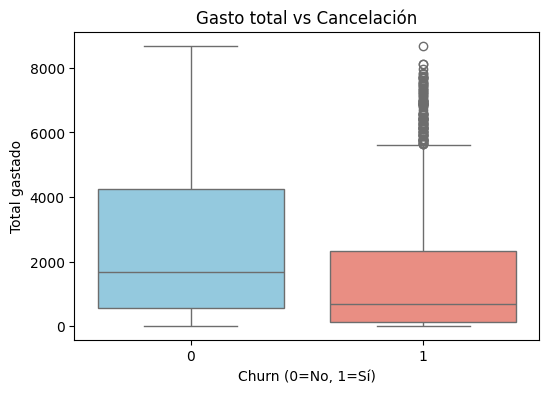

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_encoded, x='Churn', y='TotalCharges', palette=['skyblue', 'salmon'])
plt.title('Gasto total vs Cancelación')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Total gastado')
plt.show()


#Modelo Predictivo

In [ ]:
from sklearn.model_selection import train_test_split

#X = df_encoded[vars_correlacionadas]
X=df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# División 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% test
    random_state=42,     # para reproducibilidad
    stratify=y           # mantiene la proporción de clases
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)
print("Proporción Churn en train:", y_train.mean())
print("Proporción Churn en test:", y_test.mean())


Tamaño entrenamiento: (5625, 30)
Tamaño prueba: (1407, 30)
Proporción Churn en train: 0.2657777777777778
Proporción Churn en test: 0.2658137882018479


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Balancear SOLO entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Normalizar solo para el modelo que lo necesite
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definimos la grilla de parámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # fuerza de regularización
    'penalty': ['l1', 'l2', 'elasticnet'], # tipos de regularización
    'solver': ['liblinear', 'saga'],       # solvers que soportan l1 y elasticnet
    'l1_ratio': [0, 0.5, 1]                # solo aplica a elasticnet
}

# Configuramos GridSearchCV
log_reg = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',  # optimizamos por F1 para balancear precisión y recall
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Entrenamos sobre los datos balanceados y escalados
grid_search.fit(X_train_bal_scaled, y_train_bal)

# Mostramos el mejor conjunto de parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

Mejores parámetros encontrados: {'C': 100, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

best_log_reg = grid_search.best_estimator_

# Predicciones
y_pred_log = best_log_reg.predict(X_test_scaled)
y_prob_log = best_log_reg.predict_proba(X_test_scaled)[:, 1]


print(" Regresión Logística")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

 Regresión Logística
[[870 163]
 [148 226]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [ ]:
# Definimos la grilla de parámetros
param_grid = {
    'n_estimators': [100, 200],   # menos valores
    'max_depth': [10, 20, None],  # menos profundidades
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Configuramos GridSearchCV
rf = RandomForestClassifier(random_state=42,  class_weight='balanced' )
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',   # optimizamos por F1 para balancear precisión y recall
    cv=5,
    n_jobs=-1,
    verbose=1,

)

# Entrenamos sobre los datos balanceados
grid_search_rf.fit(X_train_bal, y_train_bal)

# Mejor modelo encontrado
print("Mejores parámetros encontrados:", grid_search_rf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros encontrados: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento
best_rf = grid_search_rf.best_estimator_

# Predicciones
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
print(" Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

 Random Forest
[[888 145]
 [160 214]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1033
           1       0.60      0.57      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



--- Regresión Logística ---
Exactitud: 0.7790
Precisión: 0.5810
Recall: 0.6043
F1-score: 0.5924

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



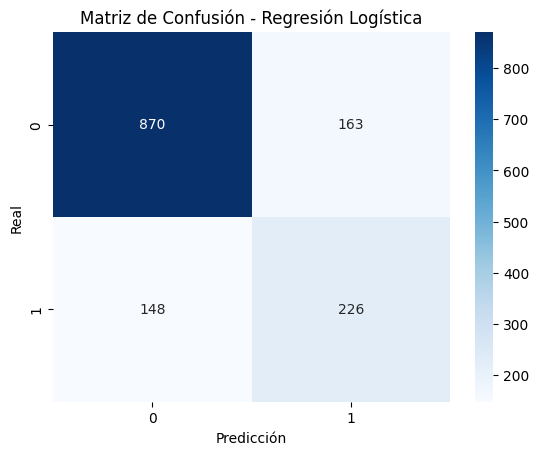

--- Random Forest ---
Exactitud: 0.7832
Precisión: 0.5961
Recall: 0.5722
F1-score: 0.5839

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1033
           1       0.60      0.57      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



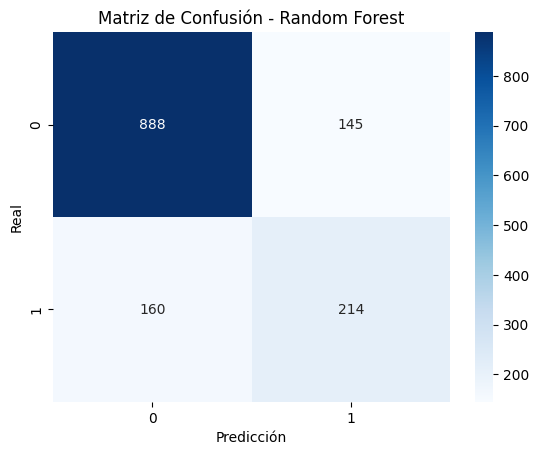

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(y_true, y_pred, nombre):
    print(f"--- {nombre} ---")
    print(f"Exactitud: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Evaluar ambos modelos
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

Se puede observar que ambos modelos presentan un rendimiento similar; sin embargo, se debe mencionar que para maximizar el modelo, se tuvo que emplear todas las variables, no solo las de mayor correlación, ya que entregaba un modelo deficiente.


#Informe de Factores Clave en la Cancelación de Clientes y Estrategias de Retención

El presente análisis tiene como objetivo identificar los factores que más influyen en la cancelación (churn) de clientes, así como proponer estrategias de retención basadas en evidencia estadística y en modelos predictivos de Machine Learning.

#**Variables más influyentes**

A partir de la matriz de correlación y la selección de variables más asociadas al churn, se identificaron las siguientes como más relevantes:



*   InternetService_Fiber Optic	+0.31
*   PaymentMethod_Electronic check	+0.30
*   MonthlyCharges	+0.19
*   PaperlessBilling_Yes	+0.19
*   Contract_Two year	-0.30
*   tenure	-0.35	A mayor antigüedad del cliente, menor probabilidad de cancelar.
*   TotalCharges	-0.20	Clientes con gasto acumulado alto tienden a permanecer.

Sin embargo, para la creación del modelo se tuvo en consideración todas las variables, ya que luego de realizar modelos exclusivamente con las mencionadas, no se obtuvo el optimo.


# **Rendimiento de los modelos**
  Regresión logística:


  *   Exactitud : 0.779
  *   Precisión : 0.581

  *   Recall: 0.6043
  *   F1-score: 0.5924

  Mejor recall: detecta más clientes que sí cancelan.


Random Forest:
  *   Exactitud : 0.7832
  *   Precisión : 0.5961
  *   Recall :0.5722
  *   F1-score:  0.5839

  Mejor precisión: menos falsos positivos.

**Conclusión de rendimiento:**

Ambos modelos muestran un desempeño similar (≈78% de exactitud), con fortalezas complementarias: la Regresión Logística es mejor detectando clientes en riesgo (recall), mientras que Random Forest reduce las falsas alarmas (precisión).

# *Interpretación de factores**


*   Precio y cargos: clientes con cargos mensuales altos tienden a cancelar, posiblemente por percepciones de falta de valor.
*   Método de pago: el uso de cheque electrónico se asocia a mayor churn, posiblemente por un perfil de cliente menos digital o menos comprometido.

*   Tipo de contrato: contratos más largos son un fuerte factor protector contra la cancelación.
*   Antigüedad (tenure): clientes nuevos son más propensos a cancelar.

*   Tipo de servicio de internet: fibra óptica presenta más cancelaciones, posiblemente por problemas de servicio o expectativas no cumplidas.



# *Estrategias de retención*
* Programas de fidelización temprana: Incentivos para clientes en sus primeros 6 meses (descuentos, mejoras en el servicio).

* Planes personalizados y flexibles: Opciones más económicas para clientes con cargos mensuales altos.

* Bonificaciones por contratos más largos: Descuentos o beneficios exclusivos para quienes pasen de contrato mensual a anual o bianual.

* Mejora en la experiencia de clientes de fibra óptica: Encuestas de satisfacción y resolución rápida de incidencias técnicas.

* Educación y soporte para clientes con cheque electrónico: Fomentar métodos de pago más cómodos (domiciliación, tarjeta) que mejoren la experiencia de facturación.

# *Próximos pasos*

* Ajustar umbrales de predicción para priorizar recall y detectar más clientes en riesgo.


* Monitorear indicadores de churn mensualmente para evaluar el impacto de las estrategias.













